# Tensorflow Regression

Let's code a more realistic regression example and introduce tf.estimator

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
x_data = np.linspace(0.0,10,1000000)
noise = np.random.randn(len(x_data))

y = mx +b

b = 5

In [16]:
y_true = (0.5)*x_data + 5 + noise 

In [17]:
y_true

array([  5.24750057,   4.52552648,   4.13962553, ...,  10.73049951,
         9.47846853,   8.68147604])

In [18]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [25]:
my_data = pd.concat([x_df,y_df],axis=1)

In [27]:
my_data.head()

,X Data,Y
0,0.00000,5.247501
1,0.00001,4.525526
2,0.00002,4.139626
3,0.00003,6.023234
4,0.00004,5.942981


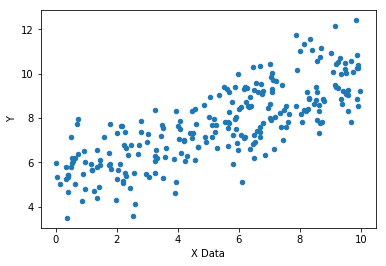

In [39]:
my_data.sample(250).plot(kind='scatter',x='X Data',y= 'Y')

In [154]:
batch_size=8

In [155]:
np.random.randn(2)

array([ 1.22929557,  0.22064193])

In [168]:
m = tf.Variable(initial_value=0.5)
b = tf.Variable(initial_value=2.31)

In [176]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [184]:
y_model = m*xph + b

In [193]:
error = tf.reduce_mean(tf.square(yph - y_model))

In [194]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(error)

In [195]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        sess.run(train,feed_dict={
            xph : x_data[rand_ind],
            yph : y_true[rand_ind]
        })
        res = sess.run(m)
    model_m , model_b = sess.run([m,b])

In [196]:
model_m

0.53873533

In [197]:
model_b

5.036304

In [199]:
y_hat = x_data*model_m + model_b

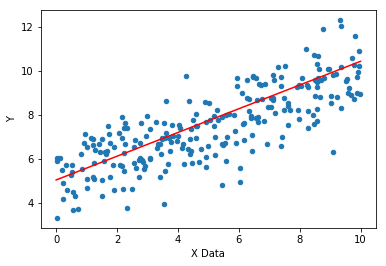

In [201]:
my_data.sample(250).plot(kind='scatter',x='X Data',y= 'Y')
plt.plot(x_data,y_hat,'r')